# Homework 2: DataFrames, Data Visualization, and Functions

## Due Saturday, October 21st at 11:59PM

Welcome to Homework 2! This week, we will cover DataFrame manipulations, making visualizations, and defining functions. You can find additional help on these topics in  [BPD 6, 9-12](https://notes.dsc10.com/01-getting_started/functions-defining.html) in the `babypandas` notes and [CIT 7-7.3](https://inferentialthinking.com/chapters/07/Visualization.html) in the textbook.

### Instructions

Remember to start early and submit often. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (see the schedule on the [Calendar](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

**Please do not use for-loops for any questions in this homework.** If you don't know what a for-loop is, don't worry – we haven't covered them yet. But if you do know what they are and are wondering why it's not OK to use them, it is because loops in Python are slow, and looping over arrays and DataFrames should usually be avoided.

🚨 ***Important:*** If you create a data visualization that is too cluttered to read or takes more than a few seconds to generate, this is a sign you are doing something wrong. Do not submit code like this, or the Gradescope autograder may fail to grade your entire assignment. It's better to leave a question blank than to submit code that will cause the autograder to fail on your full assignment.

In [1]:
# Please don't change this cell, but do make sure to run it
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

import otter
grader = otter.Notebook()

## 1. Are You Scared Yet? Analyzing Horror Movies 🎃😱

<center><img src='./images/hocus_pocus.jpg' width = 400/></center>

Spooky season is upon us! We've provided a file, `data/horror_movies.csv`, that contains information about 464 movies. For each movie, we have 10 pieces of information (see the data description below) that we'll use to generate some insights about the state of horror movies in recent years. 

| Column      | Description |
| ----------- | ----------- |
| `'Title'`      | Title of the movie, with the year in parentheses    |
| `'Country'`   | Country the movie was originally released in        |
| `'Maturity Rating'` | A rating given to the movie by the Motion Picture Association |
| `'Review Rating'` | The IMDb rating of the film, representing how good it was | 
| `'Language'` | The language the movie is in | 
| `'Filming Locations'` | The location in which the movie was filmed |
| `'Budget'` | The total amount spent on the movie |
| `'Release Month'` | The month the movie was released |
| `'Release Day'` | The day of the month the movie was released |
| `'Run Time'` | The length of the film in minutes |

Run the cell below to read the file containing all of the horror movies into a DataFrame called `horror`.

In [2]:
horror = bpd.read_csv('data/horror_movies.csv') 
horror

,Title,Country,Maturity Rating,Review Rating,Language,Filming Locations,Budget,Release Month,Release Day,Run Time
0,Rise of the Animals (2011),USA,NOT RATED,3.6,English,"Rochester, New York, USA",7000,May,1,70
1,Zombie Resurrection (2014),UK,NOT RATED,2.7,English,"Hampshire, England, UK",100000,March,23,86
2,Before Dawn (2013),Japan,NOT RATED,4.7,English,"Yorkshire, England, UK",25000,June,8,82
3,Apparition (2015),USA,NOT RATED,4.0,English,"Philadelphia, Pennsylvania, USA",3000000,May,5,100
4,Her Cry: La Llorona Investigation (2013),USA,NOT RATED,5.4,English,"Houston, Texas, USA",60000,April,19,89
...,...,...,...,...,...,...,...,...,...,...
457,Insidious: Chapter 3 (2015),USA,PG-13,6.1,English,"929 South Broadway, Downtown, Los Angeles, Cal...",10000000,June,5,97
458,The Purge (2013),USA,R,5.7,English,"Chatsworth, Los Angeles, California, USA",3000000,June,7,85
459,13 Sins (2014),Poland,R,6.3,English,"New Orleans, Louisiana, USA",4000000,April,11,93
460,Victor Frankenstein (2015),USA,PG-13,6.0,English,"London, England, UK",40000000,November,25,110


**Question 1.1.** Examine the columns available in `horror` and consider which would be the best choice of index for this DataFrame. Change the `horror` DataFrame so that it's indexed by the values in this column instead of the default index.

In [3]:
horror = horror.set_index("Title")
horror

,Country,Maturity Rating,Review Rating,Language,Filming Locations,Budget,Release Month,Release Day,Run Time
Title,,,,,,,,,
Rise of the Animals (2011),USA,NOT RATED,3.6,English,"Rochester, New York, USA",7000,May,1,70
Zombie Resurrection (2014),UK,NOT RATED,2.7,English,"Hampshire, England, UK",100000,March,23,86
Before Dawn (2013),Japan,NOT RATED,4.7,English,"Yorkshire, England, UK",25000,June,8,82
Apparition (2015),USA,NOT RATED,4.0,English,"Philadelphia, Pennsylvania, USA",3000000,May,5,100
Her Cry: La Llorona Investigation (2013),USA,NOT RATED,5.4,English,"Houston, Texas, USA",60000,April,19,89
...,...,...,...,...,...,...,...,...,...
Insidious: Chapter 3 (2015),USA,PG-13,6.1,English,"929 South Broadway, Downtown, Los Angeles, Cal...",10000000,June,5,97
The Purge (2013),USA,R,5.7,English,"Chatsworth, Los Angeles, California, USA",3000000,June,7,85
13 Sins (2014),Poland,R,6.3,English,"New Orleans, Louisiana, USA",4000000,April,11,93


In [4]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**_Note:_**  If you were to run the cell where you set the index of `horror` again, you'd see an error message. Stop and think about _why_ you'd run into an error. Once you've thought about it, click the thinking emoji below to see the reason for the error.

<br>

<details>
    <summary>Why would there be an error? 🤔</summary>
    There would be an error since you'd be trying to set the index of <code>horror</code> to a column that no longer exists in <code>horror</code> – the column wouldn't exist because it was converted to the index the first time you ran the cell (and the index is not a column)!
</details>

If you acually ran the cell twice and got an error message, don't worry. To get rid of it, re-run the cell in 1.1 where you defined the `horror` DataFrame, then run the cell in 1.2 just once, and you'll be good to go.

When you submit your work for autograding, the entire notebook will be run from start to finish. Each cell will run only once, so it's no problem if your code errors on the second run. In this case, it means you're doing something right!

**Question 1.2.** *The Ouija Experiment*, released in 2013, is among the lowest-budget movies in our dataset. What is the budget of `'The Ouija Experiment (2013)'`, and what is its `'Review Rating'`? Assign your answers to variables `OE_budget` and `OE_rating`, respectively.

In [5]:
OE_budget = horror.get('Budget').loc['The Ouija Experiment (2013)']

OE_rating = horror.get('Review Rating').loc['The Ouija Experiment (2013)']

print('The budget for The Ouija Experiment was', OE_budget, 'and the rating was', OE_rating)

The budget for The Ouija Experiment was 1200 and the rating was 3.3


In [6]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Horror movies can be really entertaining, but they can also be really bad. Assign `lowest_rated_movie` to the name of the movie with the lowest `'Review Rating'` (including the year in parentheses), and set the `'Review Rating'` of that movie to `lowest_rating`.

In [7]:
lowest_rated_movie = horror.sort_values('Review Rating').index[0]

lowest_rating = horror.get('Review Rating').min()

print('The lowest-rated movie is', lowest_rated_movie, 'with a rating of', lowest_rating)

The lowest-rated movie is Krampus: The Devil Returns (2016) with a rating of 1.6


In [8]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** That's a very low rating, but how does that compare to the other movies included in the dataset? First, plot a density histogram that shows the distribution of `'Review Rating'`. Then compute the absolute difference between the lowest rating and the **median** rating, and assign the result to the variable `below_med`.

When plotting your histogram, remember to set `density=True` and `ec='w'`. You don't have to set the `bins` argument.

3.4

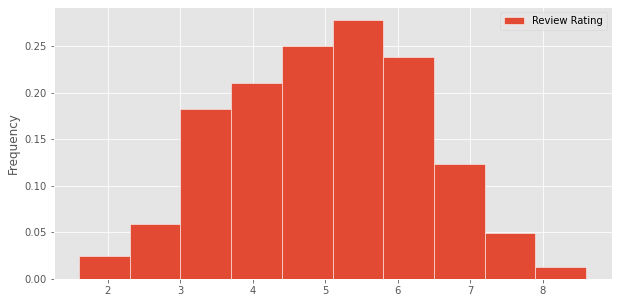

In [9]:
# Create your histogram here.
horror.plot(kind='hist', y='Review Rating', density=True, ec='w');

# Then calculate below_med.
below_med = abs(lowest_rating - horror.get('Review Rating').median())
below_med

In [10]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** How many movies in our dataset were released in October and have been given a `'Maturity Rating'`? Set the number of such movies equal to the variable `oct_rated_count`. Note that movies *without* a `'Maturity Rating'` appear as either `'NOT RATED'` or `'UNRATED'`.  

In [11]:
oct_rated_count = (
    horror
    [horror.get('Release Month') == 'October'] 
    [horror.get('Maturity Rating') != 'NOT RATED']
    [horror.get('Maturity Rating') != 'UNRATED']
    .get('Language')
    .count()
)
oct_rated_count

/opt/conda/lib/python3.9/site-packages/babypandas/bpd.py:1608: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = func(*vargs, **kwargs)
/opt/conda/lib/python3.9/site-packages/babypandas/bpd.py:1608: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = func(*vargs, **kwargs)


36

In [12]:
grader.check("q1_5")

q1_5 results: All test cases passed!

### Aside: String methods and Series

**Before proceeding to Question 1.6., make sure to read this aside.**

As we saw in [Lecture 3](https://dsc10.com/resources/lectures/lec03/lec03.html), strings have several methods available to them.

In [13]:
'Apparition (2015)'.lower()

'apparition (2015)'

In [14]:
'Apparition (2015)'.replace('i', '👀')

'Appar👀t👀on (2015)'

`babypandas` makes it easy for us to use string methods on Series of strings. To do this, we follow the pattern

```py
ser.str.method(args)
```

where `ser` is a Series, `method` is the name of a method, and `args` are the arguments to that method (if any). The key difference between string-specific Series methods and other Series methods (like `ser.mean()`) is that we need to write `.str` first.

For example, the following expression returns a Series containing the values in the `'Country'` column but converted to lowercase.

In [15]:
horror.get('Country').str.lower()

Title
Rise of the Animals (2011)                     usa
Zombie Resurrection (2014)                      uk
Before Dawn (2013)                           japan
Apparition (2015)                              usa
Her Cry: La Llorona Investigation (2013)       usa
                                             ...  
Insidious: Chapter 3 (2015)                    usa
The Purge (2013)                               usa
13 Sins (2014)                              poland
Victor Frankenstein (2015)                     usa
BloodRayne: The Third Reich (2011)           japan
Name: Country, Length: 462, dtype: object

The following expression replaces all `'i'`s with `'👀'` in the index. (Yes, you can use `.str` with the index as well!)

In [16]:
horror.index.str.replace('i', '👀')

Index(['R👀se of the An👀mals (2011)', 'Zomb👀e Resurrect👀on (2014)',
       'Before Dawn (2013)', 'Appar👀t👀on (2015)',
       'Her Cry: La Llorona Invest👀gat👀on (2013)',
       'Haunted House on Soror👀ty Row (2014)', 'Legend Has It (2009)',
       'Fet👀sh Dolls D👀e Laugh👀ng (2012)', 'Holla II (2013)',
       'The Lurk👀ng (2015)',
       ...
       'The Bad Batch (2016)', 'Dracula Untold (2014)', 'Nurse 3D (2013)',
       'Ant👀b👀rth (2016)', 'Clown (2014)', 'Ins👀d👀ous: Chapter 3 (2015)',
       'The Purge (2013)', '13 S👀ns (2014)', 'V👀ctor Frankenste👀n (2015)',
       'BloodRayne: The Th👀rd Re👀ch (2011)'],
      dtype='object', name='Title', length=462)

The following expression returns a Boolean Series, with `True` for movies whose `'Filming Locations'` contain the string `'England'` and `False` for all other movies. (`contains` is not a regular string method in Python, while the other examples – `lower` and `replace` – are.)

In [17]:
horror.get('Filming Locations').str.contains('England')

Title
Rise of the Animals (2011)                  False
Zombie Resurrection (2014)                   True
Before Dawn (2013)                           True
Apparition (2015)                           False
Her Cry: La Llorona Investigation (2013)    False
                                            ...  
Insidious: Chapter 3 (2015)                 False
The Purge (2013)                            False
13 Sins (2014)                              False
Victor Frankenstein (2015)                   True
BloodRayne: The Third Reich (2011)          False
Name: Filming Locations, Length: 462, dtype: bool

Remember that we use Boolean Series to make queries!

Now you're ready to proceed to Question 1.6. If you'd like another explanation of Series string methods, and `.str.contains` in particular, watch [this video](https://www.youtube.com/watch?v=TCcEhVA6Euw&list=PLDNbnocpJUhbczUw2Rw6bqreEECMvZ8gN&index=2).

**Question 1.6.** Which movie titles contain the word `'night'`, with any capitalization? Create an *array* called `night_movies` containing the titles of all such movies, capitalized exactly as they appear in the DataFrame. 

**_Hints:_** 
- To convert a sequence into an array, call the function `np.array` on the sequence.
- The movie names are all strings, so they may have inconsistencies in how they're capitalized. We want to count movie titles with the words `'Night'`, `'night'`, and even `'NiGHt'`. If we want to account for variations in capitalization, what operation should we call on the movie names **first**? (You may end up using `.str` twice!)

In [18]:
night_movies = (
    np.array(
        horror[horror.index.str.lower().str.contains('night')]
        .index
    )
)
night_movies

array(['Silent Night, Bloody Night: The Homecoming (2013)',
       'Dream Nightmare (2016)', "Hyde's Secret Nightmare (2011)",
       'Night Terrors (2014)', "All Sinner's Night (2014)",
       'Darkest Night (2012)', 'Evil Night (2014)',
       'Darker Than Night (2014)',
       'Poultrygeist: Night of the Chicken Dead (2006)',
       'It Comes at Night (2017)'], dtype=object)

In [19]:
grader.check("q1_6")

q1_6 results: All test cases passed!

**Question 1.7.** Create a DataFrame named `country_proportions`, indexed by `'Country'`, with one column named `'Proportion'`. The `'Proportion'` column should contain, for each country, the proportion of movies in the dataset from that country. Order the rows in descending order of `'Proportion'`.

**_Hints:_** 
- Proportions can be easily calculated from counts.
- If you pass in a **list** of columns names to `.get()`, the result will be a DataFrame containing only the columns specified in the list. 

In [20]:
country_proportions = (
    bpd.DataFrame().assign(
        Country=np.array(horror.groupby('Country').count().index),
        Proportion=np.array(horror.groupby('Country').count().get('Run Time')) / horror.shape[0]
    )
    .set_index('Country')
    .sort_values('Proportion', ascending=False)
)
country_proportions

,Proportion
Country,
USA,0.755411
UK,0.058442
Japan,0.015152
Kuwait,0.012987
Philippines,0.012987
...,...
Denmark,0.002165
Belarus,0.002165
Bahrain,0.002165


In [21]:
grader.check("q1_7")

q1_7 results: All test cases passed!

**Question 1.8**  Create a horizontal bar chart that displays the **mean** `'Review Rating'` for each country's horror movies. Sort the bars so that the country with the lowest mean appears at the very top and the country with the highest mean appears at the bottom.

**_Hints:_** 
- To get the bar chart to display nicely, try adding the keyword argument `figsize=(10, 10)`.
- If your bar chart still doesn't look very nice after setting `figsize=(10, 10)`, make sure you are first calculating the average `'Review Rating'` of each country. You should not be plotting directly from the `horror` DataFrame.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_8
manual: True
-->

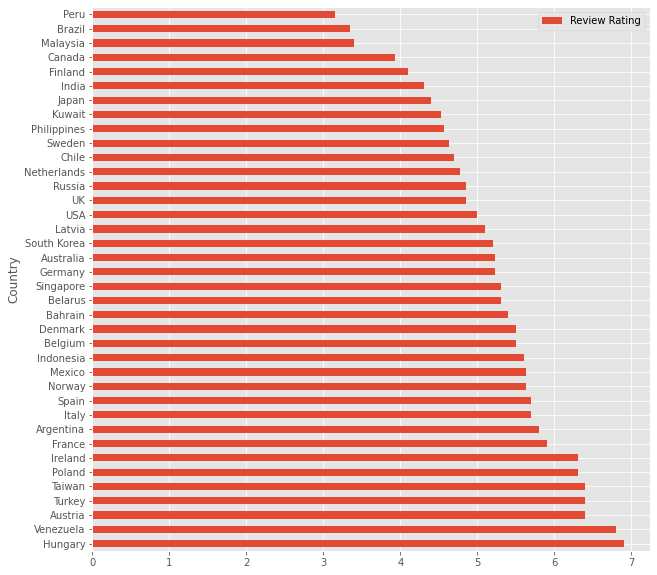

In [22]:
# Create your bar chart here.
horror_by_country = (
    horror
    .groupby('Country')
    .mean()
    .sort_values('Review Rating', ascending=False)
)

horror_by_country.plot(kind='barh', y='Review Rating', figsize=(10, 10));

<!-- END QUESTION -->



## 2. Shine Bright Like a Diamond 💎

In this section, we're going to be working alongside Jack the Jeweler to learn more about the diamond business! The data in `data/diamonds.csv` contains details about 10,000 diamonds, including the quality, dimensions, and price. The information about these diamonds can help Jack get a better understanding about what is valued most in the diamond business. The columns are described below:

| Column      | Description |
| ----------- | ----------- |
| `'carat'`      | The number of carats of the diamond       |
| `'cut'`   | The cut quality of the diamond   |
| `'color'` | The color of the diamond |
| `'clarity'` | The clarity of the diamond | 
| `'price'` | The diamond's price |
| `'length'` | The length of the diamond, in mm |
| `'width'` | The width of the diamond, in mm |
| `'depth'` | The depth of the diamond, in mm |

Run the cell below to read in the data.

In [23]:
diamonds_raw = bpd.read_csv('data/diamonds_raw.csv')
diamonds_raw

,carat,cut,color,clarity,price,length,width,depth
0,2.04,Very Good,J,SI2,9482,8.07,8.04,5.11
1,0.59,Very Good,H,VVS2,1771,5.39,5.48,3.32
2,0.34,Very Good,H,VS2,689,4.45,4.39,2.80
3,1.01,Good,H,SI2,3888,6.32,6.35,4.05
4,0.50,Ideal,D,VS2,1635,5.10,5.13,3.19
...,...,...,...,...,...,...,...,...
9995,0.32,Premium,G,VS2,561,4.33,4.38,2.70
9996,0.41,Good,J,IF,1061,4.75,4.72,3.01
9997,0.30,Ideal,G,VS2,545,4.35,4.38,2.67
9998,1.25,Premium,J,SI2,4018,6.98,6.95,4.27


**Question 2.1.** One of the first things that Jack learned about when entering the diamond business was the *depth percentage* measurement. The depth percentage of a diamond is ratio of the depth to the mean of the width and length, times 100:

$$\text{depth percentage} =\dfrac{\text{depth (in mm)}}{\text{mean of width and length (in mm)}} \cdot 100$$
    
Assign to the variable `depth_percentage` a Series with the depth percentage of each diamond in `diamonds_raw`. Then, add a column named `'depth_percentage'` containing this Series to the `diamonds_raw` DataFrame and save the result as `diamonds`.

In [24]:
depth_percentage = (
                    diamonds_raw.get('depth') /
                    ((diamonds_raw.get('width') + diamonds_raw.get('length')) / 2) 
                    * 100
                   )
diamonds = diamonds_raw.assign(
               depth_percentage=depth_percentage
           )
diamonds

,carat,cut,color,clarity,price,length,width,depth,depth_percentage
0,2.04,Very Good,J,SI2,9482,8.07,8.04,5.11,63.438858
1,0.59,Very Good,H,VVS2,1771,5.39,5.48,3.32,61.085557
2,0.34,Very Good,H,VS2,689,4.45,4.39,2.80,63.348416
3,1.01,Good,H,SI2,3888,6.32,6.35,4.05,63.930545
4,0.50,Ideal,D,VS2,1635,5.10,5.13,3.19,62.365591
...,...,...,...,...,...,...,...,...,...
9995,0.32,Premium,G,VS2,561,4.33,4.38,2.70,61.997704
9996,0.41,Good,J,IF,1061,4.75,4.72,3.01,63.569166
9997,0.30,Ideal,G,VS2,545,4.35,4.38,2.67,61.168385
9998,1.25,Premium,J,SI2,4018,6.98,6.95,4.27,61.306533


In [25]:
grader.check("q2_1")

q2_1 results: All test cases passed!

Depth percentage is important to jewelers because it determines how light refracts through the stone, which in turn affects the visual appearance of the diamond. Diamonds that are too shallow have grey rings (called 'fish eyes' 🐟 ), and diamonds that are too deep have dark spots in the middle (called 'nail heads' 🔨). The ideal depth percentage for a diamond is between 54 and 66 percent, inclusive. These diamonds really sparkle! ✨

<center><img src=images/depth_percentage.jpg width=500>
(<a href='https://www.ori-diamonds.com/blog/diamond-depth'>source</a>)</center>

**Question 2.2.** Jack is curious about how common ideally proportioned diamonds actually are. Calculate the proportion of diamonds that have an ideal depth percentage (between 54 to 66 percent, inclusive) and set the result to the variable `ideal_prop`.

In [26]:
ideal_prop = (
    diamonds
    [diamonds.get('depth_percentage') >= 54]
    [diamonds.get('depth_percentage') <= 66] 
    .get('depth_percentage') 
    .count() 
    / diamonds.get('depth_percentage') 
    .count()
)
ideal_prop

/opt/conda/lib/python3.9/site-packages/babypandas/bpd.py:1608: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = func(*vargs, **kwargs)


0.9928

In [27]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Jack has been taught that the depth percentage has an impact on the visual impact of a diamond, which he suspects also affects the price. Create a scatter plot showing how the price of a diamond varies with its depth percentage.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_3
manual: True
-->

<AxesSubplot:xlabel='depth_percentage', ylabel='price'>

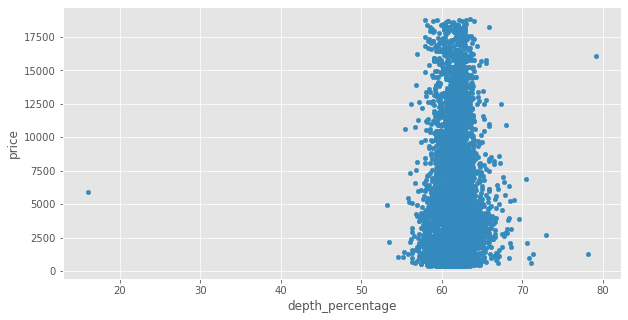

In [28]:
# Create your scatter plot here.
diamonds.plot(kind='scatter', x='depth_percentage', y='price')

<!-- END QUESTION -->



Hmm... perhaps there's a bit more to diamond pricing than just depth percentage! Jack explains that there are four common measures of the quality of a diamond, sometimes called the 4 C's: `'carat'`, `'cut'`, `'clarity'`, and `'color'`.

1) The `'carat'` simply measures the weight of the diamond. 

2) The `'cut'` is related to the depth proportion, and is considered either Ideal, Premium, Very Good, Good, or Fair (in descending order of quality).

3) The `'clarity'` describes whether the diamond has any flaws. In descending order of quality, the values of `'clarity'` in our dataset are `'IF'` (which stands for 'internally flawless'), `'VVS1'`, `'VVS2'`, `'VS1'`, `'VS2'`, `'SI1'`, `'SI2'`, and `'I1'`.

<br>

<center><img src=images/clarity.jpg width=400>
(<a href='https://www.petragems.com/education/diamond-clarity/'>source</a>)</center>

4) The `'color'` of each diamond in our dataset is described by a letter between `'D'` and `'J'`, where `'D'` represents a diamond with no color, and `'J'` represents a diamond with some color to it. Diamonds with less color are considered higher quality.

<center><img src=images/color.jpg width=200>
(<a href='https://bashertjewelry.com/pages/diamonds-color-grading'>source</a>)</center>

The `'carat'` column of `diamonds` contains numerical data, but the columns for the other 3 C's contain ordered categorical data. Since the data has an order to it, we can convert the values in those columns into numerical values, to make for easier comparisons. For example, if we assign all the values of `'J'` in the `'color'` column to 1, all the values of `'I'` in the `'color'` column to 2, etc., we'll more easily be able to search for diamonds where the color is better than an `'F'` (we could search for color values greater than 5).

For each of `'cut'`, `'clarity'`, and `'color'`, let's translate the data from categorical values to numerical values. For all three of these quality measures, we'll use the number 1 to represent the lowest quality category, and we'll count up from there by one for each category. For example, the numbers for `'clarity'` will range from 1 (for `'I1'`-rated diamonds) to 8 (for internally flawless, or `'IF'`-rated diamonds).


One way to do this conversion is to use a Python [dictionary](https://www.tutorialspoint.com/python/python_dictionary.htm).  A dictionary is a simple way to map a unique key to a value.  For example, the dictionary below maps course codes to course names.

In [29]:
dsc_courses = {
    # key: value
    'DSC 10': 'Principles of Data Science',
    'DSC 20': 'Programming and Basic Data Structures for Data Science',
    'DSC 30': 'Data Structures and Algorithms for Data Science',
    'DSC 40A': 'Theoretical Foundations of Data Science I',
    'DSC 40B': 'Theoretical Foundations of Data Science II',
    'DSC 80': 'The Practice and Application of Data Science'
}

We can access the value corresponding to each key using bracket notation.

In [30]:
dsc30_name = dsc_courses['DSC 30']
dsc30_name

'Data Structures and Algorithms for Data Science'

Here, `'DSC 30'` is the key and `'Data Structures and Algorithms for Data Science'` is the value.

Use dictionaries to help in categorical to numerical value conversions. For example, below is a dictionary containing each category in `'clarity'` as keys and numbers 1-8 as values.

In [31]:
diamonds

,carat,cut,color,clarity,price,length,width,depth,depth_percentage
0,2.04,Very Good,J,SI2,9482,8.07,8.04,5.11,63.438858
1,0.59,Very Good,H,VVS2,1771,5.39,5.48,3.32,61.085557
2,0.34,Very Good,H,VS2,689,4.45,4.39,2.80,63.348416
3,1.01,Good,H,SI2,3888,6.32,6.35,4.05,63.930545
4,0.50,Ideal,D,VS2,1635,5.10,5.13,3.19,62.365591
...,...,...,...,...,...,...,...,...,...
9995,0.32,Premium,G,VS2,561,4.33,4.38,2.70,61.997704
9996,0.41,Good,J,IF,1061,4.75,4.72,3.01,63.569166
9997,0.30,Ideal,G,VS2,545,4.35,4.38,2.67,61.168385
9998,1.25,Premium,J,SI2,4018,6.98,6.95,4.27,61.306533


In [32]:
clarity_nums = {
    'IF': 8,
    'VVS1': 7,
    'VVS2': 6,
    'VS1': 5,
    'VS2': 4,
    'SI1': 3,
    'SI2': 2,
    'I1': 1
}

In [33]:
cut_nums = {
    'Ideal': 5,
    'Premium': 4,
    'Very Good': 3,
    'Good': 2,
    'Fair': 1
}

In [34]:
color_nums = {
    'D': 7,
    'E': 6,
    'F': 5,
    'G': 4,
    'H': 3,
    'I': 2,
    'J': 1
}

**Question 2.4.** Create three functions, called `cut_numerical`, `clarity_numerical` and `color_numerical`, where each function takes in a string value describing the categorical quality for the `'cut'`, `'clarity'`, or `'color'`, respectively, and outputs the corresponding numerical value, as described above. Remember, for all three of these quality measures, we'll use the number 1 to represent the lowest quality category, and we'll count up from there by one for each category. 

**_Hint:_**  When implementing `clarity_numerical`, you can use the dictionary `clarity_nums` defined above; if you do so, your implementation of `clarity_numerical` should only take one line of code. When implementing the other two functions, you may want to define your own dictionaries, which can be done inside the functions themselves. There is a way to implement these functions that doesn't involve dictionaries, but you'll find that the dictionary approach is much more concise.

In [35]:
def cut_numerical(cut):
    return cut_nums[cut]
    
def clarity_numerical(clarity):
    return clarity_nums[clarity]

def color_numerical(color):
    return color_nums[color]

In [36]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5.** Now, create a DataFrame called `diamonds_numerical` with the same data as `diamonds`, except with the categorical values in the `'cut'`, `'clarity'`, and `'color'` columns replaced with their numerical equivalents.

**_Hint:_**  You can use the `.assign` method to **replace** values in a column, without having to create additional columns.

In [37]:
diamonds_numerical = diamonds.assign(
                         cut=diamonds.get('cut').apply(cut_numerical),
                         clarity=diamonds.get('clarity').apply(clarity_numerical),
                         color=diamonds.get('color').apply(color_numerical)
                     )
diamonds_numerical

,carat,cut,color,clarity,price,length,width,depth,depth_percentage
0,2.04,3,1,2,9482,8.07,8.04,5.11,63.438858
1,0.59,3,3,6,1771,5.39,5.48,3.32,61.085557
2,0.34,3,3,4,689,4.45,4.39,2.80,63.348416
3,1.01,2,3,2,3888,6.32,6.35,4.05,63.930545
4,0.50,5,7,4,1635,5.10,5.13,3.19,62.365591
...,...,...,...,...,...,...,...,...,...
9995,0.32,4,4,4,561,4.33,4.38,2.70,61.997704
9996,0.41,2,1,8,1061,4.75,4.72,3.01,63.569166
9997,0.30,5,4,4,545,4.35,4.38,2.67,61.168385
9998,1.25,4,1,2,4018,6.98,6.95,4.27,61.306533


In [38]:
grader.check("q2_5")

q2_5 results: All test cases passed!

**Question 2.6.** One of Jack's customers comes into Jack's store asking for a diamond whose `'cut'` is `'Premium'` or better, and whose `'color'` is `'E'` or better. The customer can afford a diamond that costs $500 or less. Assign `customer_choices` to a DataFrame of all the diamonds in `diamonds_numerical` that fit the customer's criteria and budget.

In [39]:
customer_choices = (
    diamonds_numerical 
    [diamonds_numerical.get('cut') >= cut_numerical('Premium')] 
    [diamonds_numerical.get('color') >= color_numerical('E')] 
    [diamonds_numerical.get('price') <= 500]
)
customer_choices

/opt/conda/lib/python3.9/site-packages/babypandas/bpd.py:1608: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = func(*vargs, **kwargs)
/opt/conda/lib/python3.9/site-packages/babypandas/bpd.py:1608: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = func(*vargs, **kwargs)


,carat,cut,color,clarity,price,length,width,depth,depth_percentage
135,0.20,5,7,4,367,3.81,3.77,2.33,61.477573
236,0.34,5,6,2,477,4.47,4.50,2.80,62.430323
689,0.31,4,7,2,462,4.38,4.41,2.64,60.068259
962,0.20,4,7,4,367,3.73,3.68,2.31,62.348178
1025,0.34,4,6,2,477,4.49,4.52,2.77,61.487236
...,...,...,...,...,...,...,...,...,...
9337,0.32,4,6,1,345,4.38,4.42,2.68,60.909091
9420,0.21,4,6,2,394,3.84,3.82,2.37,61.879896
9541,0.31,5,6,2,435,4.34,4.37,2.67,61.308840
9706,0.33,4,7,2,492,4.39,4.41,2.76,62.727273


In [40]:
grader.check("q2_6")

q2_6 results: All test cases passed!

**Question 2.7.** Jack wants you to find out which of the 4 C's is most closely connected to the price of a diamond. Assign an integer from 1 to 4 representing your answer to Jack's question to the variable `best_price_indicator`.

1. `'carat'`
2. `'cut'`
3. `'clarity'`
4. `'color'`

**_Hint:_**  Use scatter plots to see the relationship of each variable with `'price'`.

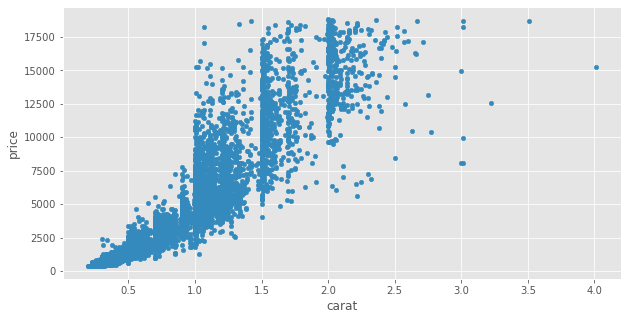

In [41]:
diamonds_numerical.plot(kind='scatter', y='price', x='carat');

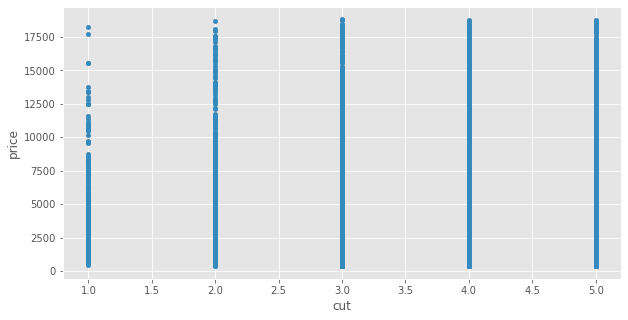

In [42]:
diamonds_numerical.plot(kind='scatter', y='price', x='cut');

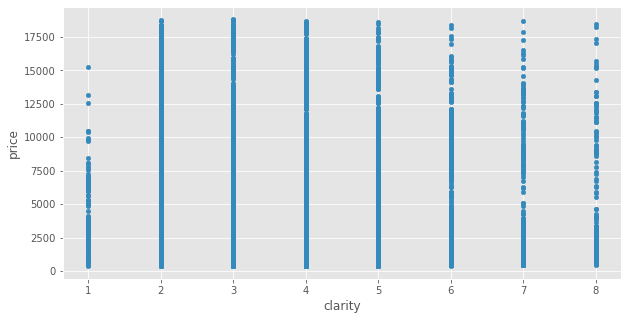

In [43]:
diamonds_numerical.plot(kind='scatter', y='price', x='clarity');

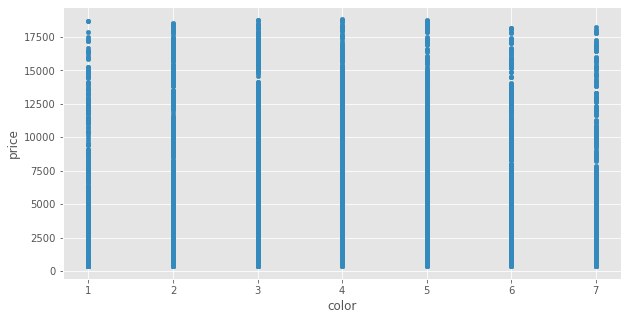

In [44]:
diamonds_numerical.plot(kind='scatter', y='price', x='color');

In [45]:
best_price_indicator = 1

In [46]:
grader.check("q2_7")

q2_7 results: All test cases passed!

**Question 2.8.** Jack asks you to show him the median price of a diamond as the length of the diamond (in mm) increases. Since Jack is more of a visuals type of person, he wants you to show him this trend in a graph. Create a plot that shows the trend of the **median** price of a diamond as the length of the diamond increases.

In [47]:
diamonds_numerical

,carat,cut,color,clarity,price,length,width,depth,depth_percentage
0,2.04,3,1,2,9482,8.07,8.04,5.11,63.438858
1,0.59,3,3,6,1771,5.39,5.48,3.32,61.085557
2,0.34,3,3,4,689,4.45,4.39,2.80,63.348416
3,1.01,2,3,2,3888,6.32,6.35,4.05,63.930545
4,0.50,5,7,4,1635,5.10,5.13,3.19,62.365591
...,...,...,...,...,...,...,...,...,...
9995,0.32,4,4,4,561,4.33,4.38,2.70,61.997704
9996,0.41,2,1,8,1061,4.75,4.72,3.01,63.569166
9997,0.30,5,4,4,545,4.35,4.38,2.67,61.168385
9998,1.25,4,1,2,4018,6.98,6.95,4.27,61.306533


<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_8
manual: True
-->

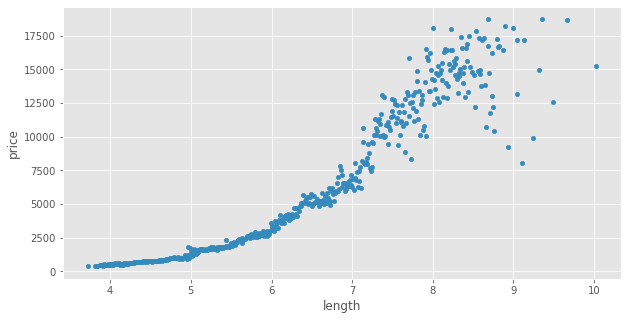

In [48]:
# Create your plot here.
# diamonds_numerical.assign(median_price=diamonds_numerical.groupby('length').median().get('price'))#.plot(kind='scatter', y='median_price', x='length');

(
    diamonds_numerical
    .groupby('length')
    .median()
    .reset_index()
    .plot(kind='scatter', x='length', y='price')
);


<!-- END QUESTION -->



## 3. As Seen on TV 📺

In this section, we'll work with a dataset from [Kaggle](https://www.kaggle.com/datasets/devanshiipatel/imdb-tv-shows/)  containing information about different TV shows, originally obtained from the Internet Movie Database (IMDb). In the cell below, we load the dataset in as a DataFrame named `tv_shows`. Take some time to look at the data in `tv_shows` to see what information is recorded.

In [49]:
# Run this cell to load the dataset.
tv_shows = bpd.read_csv('data/tv_shows.csv')
tv_shows

,Title,About,Genres,Actors,Rating,Votes,Years
0,The Family Man,A working man from the National Investigation ...,"Action, Comedy, Drama","Manoj Bajpayee, Samantha Akkineni, Priyamani, ...",8.8,57632,2019–
1,Lucifer,Lucifer Morningstar has decided he's had enoug...,"Crime, Drama, Fantasy","Tom Ellis, Lauren German, Lesley-Ann Brandt, K...",8.1,252826,2016–
2,The Handmaid's Tale,"Set in a dystopian future, a woman is forced t...","Drama, Sci-Fi, Thriller","Elisabeth Moss, Yvonne Strahovski, Joseph Fien...",8.4,187007,2017–
3,StartUp,"A desperate banker, a Haitian-American gang lo...","Crime, Thriller","Adam Brody, Edi Gathegi, Otmara Marrero, Krist...",8.0,18165,2016–2018
4,Game of Thrones,Nine noble families fight for control over the...,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",9.3,1823966,2011–2019
...,...,...,...,...,...,...,...
2826,A Drop of True Blood,A kids' show centered around a special agent-i...,"Short, Drama, Fantasy","Claudia Abrego, Ryan Kwanten, Stephen Moyer, A...",8.1,572,2010–
2827,Yu-Gi-Oh! GX,An anthology series in which each episode is a...,"Animation, Action, Adventure","Matthew Labyorteaux, Wayne Grayson, Tony Saler...",6.8,4115,2004–2008
2828,Special Agent Oso,Four teenage heroes-for-hire warp through the ...,"Animation, Action, Adventure","Meghan Strange, Gary Anthony Williams, Sean As...",5.2,475,2009–2012
2829,Metal Hurlant Chronicles,An expose on the U.S. government's secret prog...,"Action, Sci-Fi","Scott Adkins, Karl E. Landler, Dominique Pinon...",5.8,1630,2012–2014


**Question 3.1.** If you look at the `'Years'` column in the DataFrame, you'll notice that most of the year ranges are separated by en dashes (`–`). Note that if a show was still on air at the time of data collection, its value in the `'Years'` column will end with an en dash. For example, in the first row of the DataFrame, the value in the `'Years'` column is `'2019–'`, meaning that the show has been airing since 2019. The presence of en dashes indicates that the `'Years'` column contains strings, not ints, since Python never displays ints separated by en dashes.

Complete the implementation of the function `extract_start_year_as_int`, which takes as input a string `v` representing a year range, like the values listed in the DataFrame above, and outputs the start year of `v` as an int. For example, passing in the string `'2016–2018'` to the function should return the int `2016`.

Then, use your function to add a column called `'StartYear'` to the `tv_shows` DataFrame that contains the start year of each show as an integer. Make sure to 'save' your changes in the `tv_shows` DataFrame!


**_Hints:_** 
- En dashes (`–`) are **not** the same as hyphens (`-`)! The easiest way to get an en dash is to **copy it from here**: `–`.
- The string method [`.split()`](https://docs.python.org/3/library/stdtypes.html#str.split) will be helpful.


In [50]:
def extract_start_year_as_int(v):
    return int(v.replace('–', ' ').split()[0])

In [51]:
tv_shows = tv_shows.assign(
               StartYear=tv_shows.get('Years').apply(extract_start_year_as_int)
           )
tv_shows

,Title,About,Genres,Actors,Rating,Votes,Years,StartYear
0,The Family Man,A working man from the National Investigation ...,"Action, Comedy, Drama","Manoj Bajpayee, Samantha Akkineni, Priyamani, ...",8.8,57632,2019–,2019
1,Lucifer,Lucifer Morningstar has decided he's had enoug...,"Crime, Drama, Fantasy","Tom Ellis, Lauren German, Lesley-Ann Brandt, K...",8.1,252826,2016–,2016
2,The Handmaid's Tale,"Set in a dystopian future, a woman is forced t...","Drama, Sci-Fi, Thriller","Elisabeth Moss, Yvonne Strahovski, Joseph Fien...",8.4,187007,2017–,2017
3,StartUp,"A desperate banker, a Haitian-American gang lo...","Crime, Thriller","Adam Brody, Edi Gathegi, Otmara Marrero, Krist...",8.0,18165,2016–2018,2016
4,Game of Thrones,Nine noble families fight for control over the...,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",9.3,1823966,2011–2019,2011
...,...,...,...,...,...,...,...,...
2826,A Drop of True Blood,A kids' show centered around a special agent-i...,"Short, Drama, Fantasy","Claudia Abrego, Ryan Kwanten, Stephen Moyer, A...",8.1,572,2010–,2010
2827,Yu-Gi-Oh! GX,An anthology series in which each episode is a...,"Animation, Action, Adventure","Matthew Labyorteaux, Wayne Grayson, Tony Saler...",6.8,4115,2004–2008,2004
2828,Special Agent Oso,Four teenage heroes-for-hire warp through the ...,"Animation, Action, Adventure","Meghan Strange, Gary Anthony Williams, Sean As...",5.2,475,2009–2012,2009
2829,Metal Hurlant Chronicles,An expose on the U.S. government's secret prog...,"Action, Sci-Fi","Scott Adkins, Karl E. Landler, Dominique Pinon...",5.8,1630,2012–2014,2012


In [52]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** You've been starting to feel that TV shows are just not as good as they used to be.  Create an appropriate plot that shows the relationship between the `'StartYear'` and the `'Rating'` of each show in `tv_shows`.

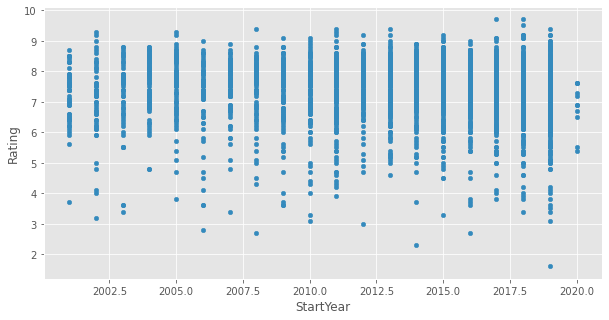

In [53]:
# Create your plot here.
tv_shows.plot(kind='scatter', x='StartYear', y='Rating');

Unfortunately, this plot is not very informative. Instead, make a plot that shows how the **median** `'Rating'` of all shows from a given `'StartYear'` has changed over time. 

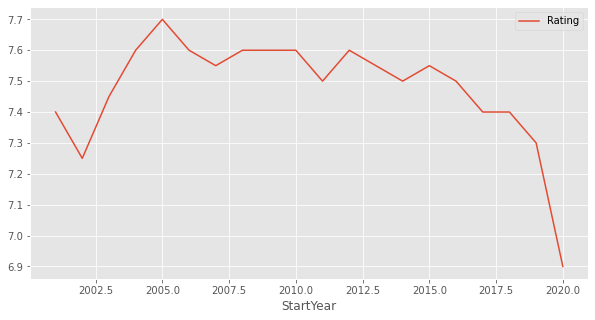

In [54]:
# Create your plot here
median_rating = (
    tv_shows
    .groupby('StartYear')
    .median()
)

median_rating.reset_index().plot(kind='line', x='StartYear', y='Rating');

Now, use the second plot you made to determine whether TV shows are as good as they used to be. Choose the most accurate statement below and assign an integer from 1 to 3 to the variable `q3_2`.

1. TV shows have been getting worse since 2000.
2. TV shows were getting worse until 2005, and since then, they have improved.
3. TV shows have been getting worse since 2005.

In [55]:
q3_2 = 3
q3_2

3

In [56]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** Assign `most_common_genres` to a DataFrame that contains the five most common genre combinations of TV shows in our dataset, in descending order of popularity. The DataFrame should be indexed by `'Genres'` and have only one column, `'Count'`, which is the number of TV shows of that genre combination.

**_Note:_**  For this question, each TV show is assicated with one set of genres, which determines its genre combination. For example, `'Action, Adventure, Drama'` is one genre combination. `'Comedy'`, by itself, is another genre combination.

In [57]:
most_common_genres = (
    tv_shows 
    .groupby('Genres') 
    .count() 
    .assign(
        Count=tv_shows.groupby('Genres').count().get('Title')
    )
    .drop(columns=['Title', 'About', 'Actors', 'Votes', 'Years', 'StartYear', 'Rating'])
).sort_values('Count', ascending=False).iloc[0:5]
 
most_common_genres

,Count
Genres,
Comedy,270
Drama,180
"Crime, Drama, Mystery",173
"Animation, Action, Adventure",142
"Comedy, Drama",107


In [58]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.** Using the `most_common_genres` DataFrame you created in Question 3.3, create a horizontal bar chart that shows the distribution of TV shows into these five genre combinations. Make sure the bars are sorted such that the most common genre appears as the top-most bar in the bar chart.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_4
manual: true
-->

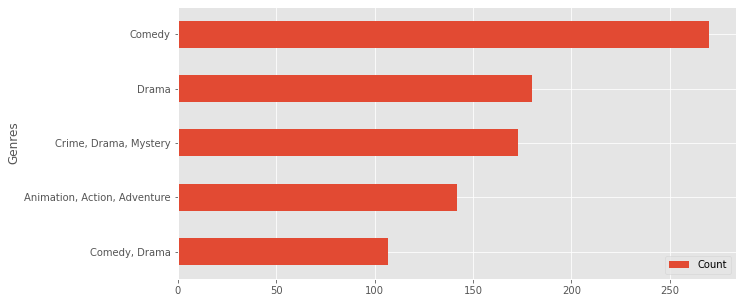

In [59]:
# Create your bar chart here.
(
    most_common_genres 
    .sort_values('Count', ascending=True) 
    .plot(kind='barh', y='Count')
);

<!-- END QUESTION -->



**Question 3.5.** Assign the variable `third_highest` to the genre combination with the third highest average overall `'Rating'` (*not* the third highest frequency), among all genre combinations in `tv_shows`.

Do not manually type out your answer. Use `babypandas` methods to produce the answer.

In [60]:
third_highest = (
    tv_shows
    .groupby('Genres')
    .mean()
    .sort_values('Rating', ascending=False)
    .get('Rating')
    .index[2]
)
third_highest

'Adventure, Comedy, Mystery'

In [61]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 3.6.** Create a histogram showing the distribution of `'Rating'` among shows in the `tv_shows` DataFrame.

Remember to set `density=True` since we always use density histograms and `ec='w'` to make the separation of the bars more clear. You don't have to set the `bins` argument.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_6
manual: true
-->

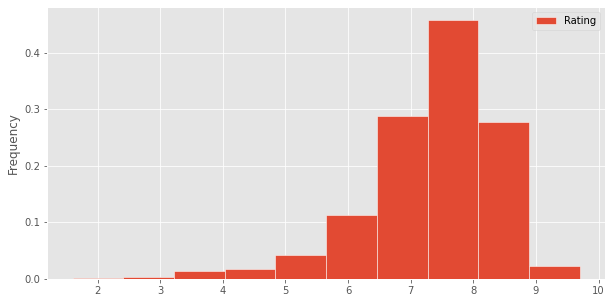

In [62]:
# Create your histogram here.
tv_shows.plot(kind='hist', y='Rating', density=True, ec='w');

<!-- END QUESTION -->

**Question 3.7.** Using the `'StartYear'` column, identify the year between 2001 and 2009 (inclusive) that has the lowest total number of `'Votes'` for TV shows released that year. Assign this year to the variable `lowest_01_09`.

Please make sure to use `babypandas` methods to find your answer; you should not type in the year manually.

<!--
BEGIN QUESTION
name: q3_7
-->

In [63]:
lowest_01_09 = (
    tv_shows
    [tv_shows.get('StartYear') >= 2001]
    [tv_shows.get('StartYear') <= 2009]
    .groupby('StartYear').sum()
    .sort_values('Votes', ascending=True)
    .index[0]
)
lowest_01_09

2002

In [64]:
grader.check("q3_7")

q3_7 results: All test cases passed!

## 4. Let's TED Talk 💡🎤

TED Talks (Technology, Entertainment, and Design) are short, powerful presentations that cover a wide range of topics, delivered by experts in the field. Notably, a few UCSD Alumni and students were featured speakers at TEDxUCSD events in 2019 and again in May 2023. With millions of daily views, TED Talks have evolved into a critical platform for idea sharing and thought leadership.

<img src='./images/TED-UCSD.PNG' width=350/>

We have a dataset of TED Talks on YouTube from [Kaggle](https://www.kaggle.com/datasets/purnasaikirank/ted-talks-youtube?resource=download). First, we'll read in the data from a CSV. There is no good index, so we will leave it unset.

In [65]:
ted_data = bpd.read_csv('data/ted_main.csv')
ted_data

,comments,duration,event,main_speaker,title,published_date,ratings,views
0,4553,1164,TED2006,Ken Robinson,Ken Robinson: Do schools kill creativity?,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110
1,265,977,TED2006,Al Gore,Al Gore: Averting the climate crisis,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520
2,124,1286,TED2006,David Pogue,David Pogue: Simplicity sells,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292
3,200,1116,TED2006,Majora Carter,Majora Carter: Greening the ghetto,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550
4,593,1190,TED2006,Hans Rosling,Hans Rosling: The best stats you've ever seen,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869
...,...,...,...,...,...,...,...,...
2545,17,476,TED2017,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...",450430
2546,6,290,TED2017,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...",417470
2547,10,651,TED2017,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...",375647
2548,32,1100,TEDxMileHigh,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...",419309


**Question 4.1.** You'll notice that the values in the `'published_date'` column are really large integers. It turns out they're stored as Unix timestamps, which measure the number of seconds that have elapsed since midnight on January 1st, 1970. So, January 1st, 1970, at 00:00:00 UTC is time 0. (If you're curious, [this site](https://www.unixtimestamp.com) shows a live 'Unix timestamp clock.')

Define a function `timestamp_to_year` that takes a Unix timestamp as input, like the values listed in the DataFrame above, and returns the corresponding year as an integer.

**_Note:_**  Don't worry about leap years or leap seconds here.

In [66]:
def timestamp_to_year(timestamp):
    
    secs_in_year = 60*60*24*365
    
    return int(timestamp / secs_in_year) + 1970

In [67]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** Use your `timestamp_to_year` function and the `.apply` method to convert all of the timestamps in the `'published_date'` column of `ted_data` into their correct year. Do this without creating an additional column or reordering the existing columns. Assign the resulting DataFrame to the variable name `ted`.

In [68]:
ted = ted_data.assign(
          published_date=ted_data.get('published_date').apply(timestamp_to_year)
      )
ted

,comments,duration,event,main_speaker,title,published_date,ratings,views
0,4553,1164,TED2006,Ken Robinson,Ken Robinson: Do schools kill creativity?,2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110
1,265,977,TED2006,Al Gore,Al Gore: Averting the climate crisis,2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520
2,124,1286,TED2006,David Pogue,David Pogue: Simplicity sells,2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292
3,200,1116,TED2006,Majora Carter,Majora Carter: Greening the ghetto,2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550
4,593,1190,TED2006,Hans Rosling,Hans Rosling: The best stats you've ever seen,2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869
...,...,...,...,...,...,...,...,...
2545,17,476,TED2017,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,2017,"[{'id': 3, 'name': 'Courageous', 'count': 24},...",450430
2546,6,290,TED2017,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,2017,"[{'id': 22, 'name': 'Fascinating', 'count': 32...",417470
2547,10,651,TED2017,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,2017,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...",375647
2548,32,1100,TEDxMileHigh,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,2017,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...",419309


In [69]:
grader.check("q4_2")

q4_2 results: All test cases passed!

🚨 **Important**: Now that we've changed the values in the `'published_date'` column, we'll use `ted` instead of `ted_data` from here on out.

**Question 4.3.** 
Notice that the `'title'` column of `ted_talks` includes the name of the speaker followed by the actual title of the TED talk. Define a function named `clean_title` that takes as input a string from the `'title'` column of `ted` and returns the title of the TED talk, without the speaker's name included. Example behavior is shown below.

```py
>>> clean_title('Al Gore: Averting the climate crisis')
'Averting the climate crisis'
```


Once you have created the function, use the `.apply` method to apply the function to all elements of the `'title'` column in `ted`. Do not create a new column or a new DataFrame.

In [70]:
def clean_title(title):
    return ' '.join(title.replace(':', ' ').split()[2:-1]) + ' ' + title.split()[-1]
    
ted = (
          ted
          .assign(title=ted.get('title').apply(clean_title))
      )
    
# Test cases for your own reference. Feel free to test out more!
print(clean_title('Al Gore: Averting the climate crisis'))  # Should print 'Averting the climate crisis'
print(clean_title('Hans Rosling: The best stats you\'ve ever seen')) # Should print 'The best stats you've ever seen'

Averting the climate crisis
The best stats you've ever seen


In [71]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** We'll say a talk's title is a question if the character `'?'` appears anywhere in the title. Add a column to `ted` named `'is_question'` that contains the value `True` for talks whose titles are questions and `False` for talks whose titles aren't questions. Save the resulting DataFrame as `ted_with_question`; **don't** modify the current `ted` DataFrame, otherwise you may start to fail some test cases you're currently passing.

**_Hint:_**  If you try and check whether a title contains `'?'` using the same method you used in Question 1.6, you'll run into an error. Instead of using just `'?'`, you'll need to use `'\?'`. When using the Series method from Question 1.6, the `'?'` is interpreted as a special character; by using `'\?'` instead, we're telling Python to find all titles that contain a literal question mark. (If you're curious, the technical term for this is 'escaping' the `'?'` character.)

In [72]:
ted_with_question = ted.assign(
    is_question=ted.get('title').str.contains('\?')
)
ted_with_question


,comments,duration,event,main_speaker,title,published_date,ratings,views,is_question
0,4553,1164,TED2006,Ken Robinson,Do schools kill creativity?,2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110,True
1,265,977,TED2006,Al Gore,Averting the climate crisis,2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520,False
2,124,1286,TED2006,David Pogue,Simplicity sells,2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292,False
3,200,1116,TED2006,Majora Carter,Greening the ghetto,2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550,False
4,593,1190,TED2006,Hans Rosling,The best stats you've ever seen,2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869,False
...,...,...,...,...,...,...,...,...,...
2545,17,476,TED2017,Duarte Geraldino,What we're missing in the debate about immigra...,2017,"[{'id': 3, 'name': 'Courageous', 'count': 24},...",450430,False
2546,6,290,TED2017,Armando Azua-Bustos,The most Martian place on Earth,2017,"[{'id': 22, 'name': 'Fascinating', 'count': 32...",417470,False
2547,10,651,TED2017,Radhika Nagpal,What intelligent machines can learn from a sch...,2017,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...",375647,False
2548,32,1100,TEDxMileHigh,Theo E.J. Wilson,Wilson A black man goes undercover in the alt-...,2017,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...",419309,False


In [73]:
grader.check("q4_4")

q4_4 results: All test cases passed!

**Question 4.5.** Using `ted_with_question`, calculate the mean number of views for titles that are questions and for titles that are not questions. Store the result for titles with a question in a variable called `mean_views_with_question`, and the result for titles without a question in a variable called `mean_views_without_question`.

In [74]:
mean_views_with_question = ted_with_question[ted_with_question.get('is_question') == True].get('views').mean()
mean_views_without_question = ted_with_question[ted_with_question.get('is_question') == False].get('views').mean()

print('Average views of talks with questions in the title:', mean_views_with_question)
print('Average views of talks without questions in the title:', mean_views_without_question)

Average views of talks with questions in the title: 1966803.3942307692
Average views of talks without questions in the title: 1674450.6712211785


In [75]:
grader.check("q4_5")

q4_5 results: All test cases passed!

**Question 4.6.** Let's look at the mean number of views per event. For the 20 events with lowest mean number of views, create a horizontal bar chart that displays the mean views for each event. Sort the bars in ascending order so that the event with the fewest mean views appears at the very top of the bar chart. 

Make sure **not to modify** the DataFrames `ted` or `ted_with_question` while creating your bar chart, otherwise you may fail some test cases you are currently passing.



In [76]:
ted_with_question

,comments,duration,event,main_speaker,title,published_date,ratings,views,is_question
0,4553,1164,TED2006,Ken Robinson,Do schools kill creativity?,2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110,True
1,265,977,TED2006,Al Gore,Averting the climate crisis,2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520,False
2,124,1286,TED2006,David Pogue,Simplicity sells,2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292,False
3,200,1116,TED2006,Majora Carter,Greening the ghetto,2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550,False
4,593,1190,TED2006,Hans Rosling,The best stats you've ever seen,2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869,False
...,...,...,...,...,...,...,...,...,...
2545,17,476,TED2017,Duarte Geraldino,What we're missing in the debate about immigra...,2017,"[{'id': 3, 'name': 'Courageous', 'count': 24},...",450430,False
2546,6,290,TED2017,Armando Azua-Bustos,The most Martian place on Earth,2017,"[{'id': 22, 'name': 'Fascinating', 'count': 32...",417470,False
2547,10,651,TED2017,Radhika Nagpal,What intelligent machines can learn from a sch...,2017,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...",375647,False
2548,32,1100,TEDxMileHigh,Theo E.J. Wilson,Wilson A black man goes undercover in the alt-...,2017,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...",419309,False


<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4_6
manual: true

-->

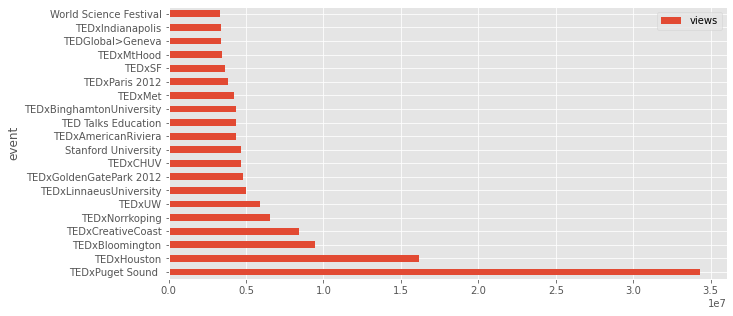

In [77]:
# Create your bar chart here.
(
    ted_with_question
    .groupby('event')
    .mean()
    .sort_values('views', ascending=False)
    .iloc[:20]
    .reset_index()
    .plot(kind='barh', x='event', y='views')
);


<!-- END QUESTION -->



So far, we haven't used the `'ratings'` column in `ted_with_question` at all for our analysis. The values in the `'ratings'` column appear to be formatted strangely:

In [78]:
first_rating_string = (
    ted_with_question
    .get('ratings')
    .iloc[0]
)
first_rating_string

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

If we look closely, we see that each value in the `'ratings'` column looks like a list of dictionaries! While these values _look_ like lists, they are actually strings.

In [79]:
type(first_rating_string)

str

Conveniently, it turns out there's a function built into Python called `eval` that takes in a string that contains a Python expression and evaluates that expression. We use it below.

In [80]:
eval('np.array([1, 2, 3]) + np.array([4, 5, 6])')

array([5, 7, 9])

In [81]:
eval('ted.shape[0]')

2550

In the two examples above, `eval` seemed to make things more complicated, not less complicated. However, `eval` can help turn the values in the `'ratings'` column, which are strings (of lists, of dictionaries), to actual lists.

For example:

In [82]:
first_rating_list = eval(first_rating_string)
first_rating_list

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [83]:
type(first_rating_list)

list

Now it's a bit more clear how these lists are formatted. Each individual dictionary corresponds to a different tag that a video received, e.g. `'Funny'` or `'Persuasive'`. The value associated with the `'count'` key represents the number of votes, or ratings, that video received for the corresponding tag. For instance, the first talk in the dataset received 10704 votes for the `'Persuasive'` tag.

Below, we've defined a function that takes in a single value from the `'ratings'` column and returns a single dictionary (not a list of dictionaries) corresponding to the most common tag for that video. You don't need to understand how the function works.

In [84]:
def most_common_tag_dict(rating_str):
    rating_list = eval(rating_str)
    rating_list_sorted = sorted(rating_list, key=lambda x: x['count'])
    return rating_list_sorted[-1]

For example, in the string below, the tag with the most votes is `'Inspiring'`:

In [85]:
first_rating_string

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

And so:

In [86]:
most_common_tag_dict(first_rating_string)

{'id': 10, 'name': 'Inspiring', 'count': 24924}

**Question 4.7.** Complete the implementation of the function `most_common_tag_name`, which takes in a value from the `'ratings'` column of `ted_with_question` and returns the name of the most common tag as a string. For instance, `most_common_tag_name(first_rating_string)` should return `'Inspiring'`.

Then, assign `ted_final` to a DataFrame with all of the same columns as `ted_with_question`, with an additional column named `'most_common_tag'` containing the most common tag name for each talk.

**_Hints:_** 
- Most of the work has already been done for you – you should use `most_common_tag_dict` in your implementation of `most_common_tag_name`.
- Dictionaries were introduced just before Question 2.4. Reviewing that part of the notebook will be helpful if you're stuck.

In [87]:
def most_common_tag_name(rating_string):
    return most_common_tag_dict(rating_string)['name']
    
ted_final = ted_with_question.assign(most_common_tag=ted_with_question.get('ratings').apply(most_common_tag_name))
ted_final

,comments,duration,event,main_speaker,title,published_date,ratings,views,is_question,most_common_tag
0,4553,1164,TED2006,Ken Robinson,Do schools kill creativity?,2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110,True,Inspiring
1,265,977,TED2006,Al Gore,Averting the climate crisis,2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520,False,Funny
2,124,1286,TED2006,David Pogue,Simplicity sells,2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292,False,Funny
3,200,1116,TED2006,Majora Carter,Greening the ghetto,2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550,False,Inspiring
4,593,1190,TED2006,Hans Rosling,The best stats you've ever seen,2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869,False,Informative
...,...,...,...,...,...,...,...,...,...,...
2545,17,476,TED2017,Duarte Geraldino,What we're missing in the debate about immigra...,2017,"[{'id': 3, 'name': 'Courageous', 'count': 24},...",450430,False,Informative
2546,6,290,TED2017,Armando Azua-Bustos,The most Martian place on Earth,2017,"[{'id': 22, 'name': 'Fascinating', 'count': 32...",417470,False,Informative
2547,10,651,TED2017,Radhika Nagpal,What intelligent machines can learn from a sch...,2017,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...",375647,False,Informative
2548,32,1100,TEDxMileHigh,Theo E.J. Wilson,Wilson A black man goes undercover in the alt-...,2017,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...",419309,False,Inspiring


In [88]:
grader.check("q4_7")

q4_7 results: All test cases passed!

**Question 4.8.** Use `ted_final` to create a plot that depicts the average number of views for all videos with each `'most_common_tag'`. 

Then, use your plot to quickly determine which `'most_common_tag'` gets the most views, on average. Save your result as `people_love`.  

For this question, do not use `babypandas` methods to find `people_love`. Instead, you must manually type in the name of the tag after looking at the plot you created.

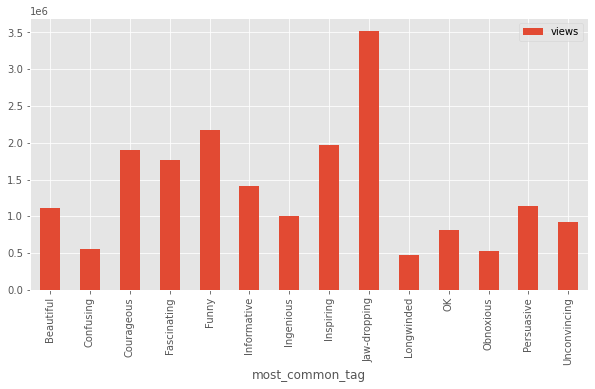

In [89]:
# Create your plot here.
ted_final.groupby('most_common_tag').mean().plot(kind='bar', y='views');

In [90]:
people_love = 'Jaw-dropping'
people_love

'Jaw-dropping'

In [91]:
grader.check("q4_8")

q4_8 results: All test cases passed!

<div class='alert alert-block alert-danger'>
    In this question, we used the Python <code>eval</code> function out of necessity. In general, it's a good idea to <b>avoid</b> the <code>eval</code> function. This is because it's possible to call it on an input that looks safe, but contains malicious code. If you're really curious, watch starting around 9 minutes in <a href='https://podcast.ucsd.edu/watch/wi23/dsc80_a00/15'>this video</a> – you can see an example from another data science course where we call the <code>eval</code> function and lose all of our files! 😱
</div>

## 5. Final Stretch 🧘‍♀️

Suppose we have a DataFrame named `data` with two numerical columns, `'x'` and `'y'`. Consider the following scatter plot, which was generated by calling `data.plot(kind='scatter', x='x', y='y')`:

<img src='images/q4_scatter_plot.png' width=400/>

Now consider these two histograms:

<center>
    <table><tr>
        <td><center><b>Histogram A</b><br> <img src='images/q4_histogram_one.png' width=400></center> </td>
        <td><center><b>Histogram B</b><br> <img src='images/q4_histogram_two.png' width=400></center> </td>
    </tr></table>
</center>

**Question 5.1.** Which of the following lines of code generated **Histogram B**? Assign `which_code` to either 1, 2, 3, or 4.
 
 
 1. `data.plot(kind='hist', density=True, y='x')`
 2. `data.plot(kind='hist', density=False, y='x')`
 3. `data.plot(kind='hist', density=True, y='y')`
 4. `data.plot(kind='hist', density=False, y='y')` 

In [92]:
which_code = 3

In [93]:
grader.check("q5_1")

q5_1 results: All test cases passed!

**Question 5.2.** Suppose we run this block of code:

```py
new_data = bpd.DataFrame().assign(
    x = data.get('x') / 4,
    y = data.get('y')
)
```
    
We then run 

```py
new_data.plot(kind='hist', density=True, y='x')
```

How will this histogram look compared to the histogram created by 

```py
data.plot(kind='hist', density=True, y='x')
```

assuming both histograms are drawn on the same axes? Assign `histogram_difference` to either 1, 2, 3, or 4, corresponding to your choice.


1. The `new_data` histogram will be narrower and shorter than the `data` histogram.
2. The `new_data` histogram will be wider and shorter than the `data` histogram.
3. The `new_data` histogram will be narrower and taller than the `data` histogram.
4. The `new_data` histogram will be wider and taller than the `data` histogram.



**_Hint:_** Look at the end of [Lecture 7](https://dsc10.com/resources/lectures/lec07/lec07.html#Plotting-overlaid-histograms) for an example of two histograms drawn on the same axes.

In [94]:
histogram_difference = 3

In [95]:
grader.check("q5_2")

q5_2 results: All test cases passed!

**Question 5.3.** Below, we show Histogram A again.

<img src='./images/q4_histogram_one.png' width=400/>

What **percent** of values in Histogram A are between -5 (inclusive) and -3 (exclusive)? While we cannot answer this question exactly since we do not know where the bins start and end, we can still approximate the answer. Assign the variable `percent_between` to a number 1 through 5, corresponding to the closest answer.

1. 22%
1. 27%
1. 34%
1. 40%
1. 48%

In [96]:
percent_between = 4 

In [97]:
grader.check("q5_3")

q5_3 results: All test cases passed!

## Finish Line: Almost there, but make sure to follow the steps below to submit! 🏁

**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style='color:Maroon;background-color:Maroon;border:0 none; height: 3px;'>

Please cite tools here.

<hr style='color:Maroon;background-color:Maroon;border:0 none; height: 3px;'>

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells. 
1. Read through the notebook to make sure all cells ran and all tests passed.
1. Run the cell below to run all tests, and make sure that they all pass.
1. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
1. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
1. Check that you have a confirmation email from Gradescope and save it as proof of your submission. 

With homeworks, unlike with labs, the grade you see on Gradescope is **not your final score**. We will run correctness tests after the assignment's due date has passed.

In [98]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_7 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_6 results: All test cases passed!

q2_7 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_5 results: All test cases passed!

q3_7 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q4_4 results: All test cases passed!

q4_5 results: All test cases passed!

q4_7 results: All test cases passed!

q4_8 results: All test cases passed!

q5_1 results: All test cases passed!

q5_2 results